# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [200]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Carregamento do arquivo
df = pd.read_csv("C:\\Users\\joass\\Downloads\\b1abb33c4f.csv")

In [150]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Situacao
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,asfixia normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,asfixia normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,asfixia normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,asfixia normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,asfixia normal


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
#Categorização das asfixias
df.loc[(df['APGAR5'] >= 0) & (df['APGAR5'] <= 3), 'Situacao'] = 'asfixia grave'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'Situacao'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'Situacao'] = 'asfixia leve'
df.loc[(df['APGAR5'] >= 8) & (df['APGAR5'] <= 10), 'Situacao'] = 'asfixia normal'

In [24]:
#nova coluna
df[['Situacao']]

,Situacao
0,asfixia normal
1,asfixia normal
2,asfixia normal
3,asfixia normal
4,asfixia normal
...,...
27023,asfixia normal
27024,asfixia normal
27025,asfixia normal
27026,asfixia normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

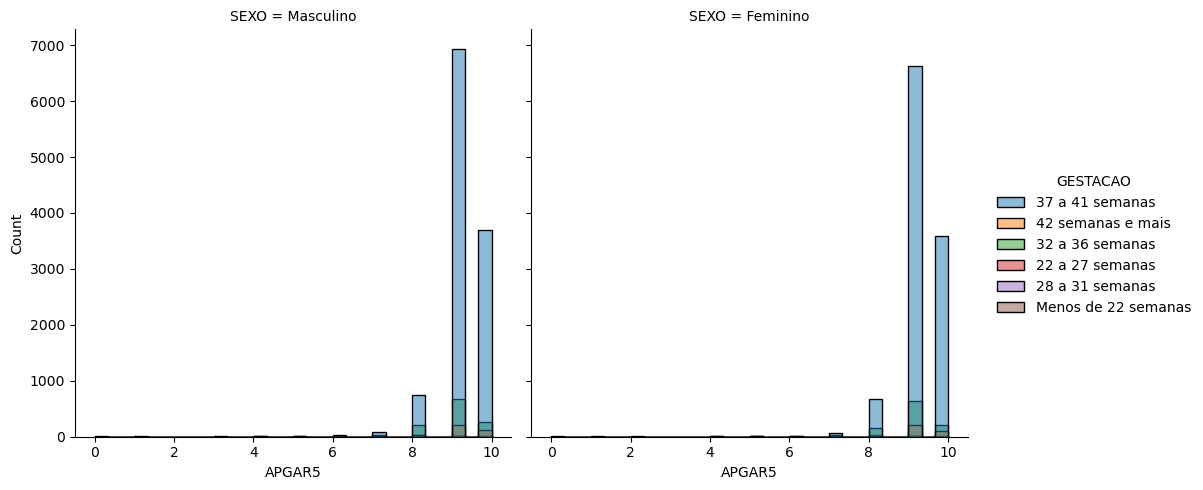

In [39]:
#comparação de colunas
sns.displot(data=df, x='APGAR5', hue='GESTACAO', col='SEXO', bins=30)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [63]:
#Cruzando as tabelas APGAR com GESTACAO com a CROSSTAB
tabela =pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

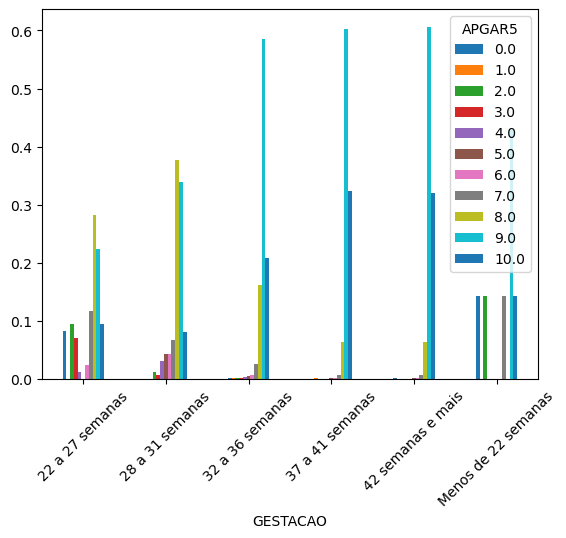

In [106]:
#Percentual das linhas
tab_porc = tabela.div(tabela.sum(axis=1), axis=0)
tab_porc.plot.bar()
plt.xticks(rotation= 45)
plt.show()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

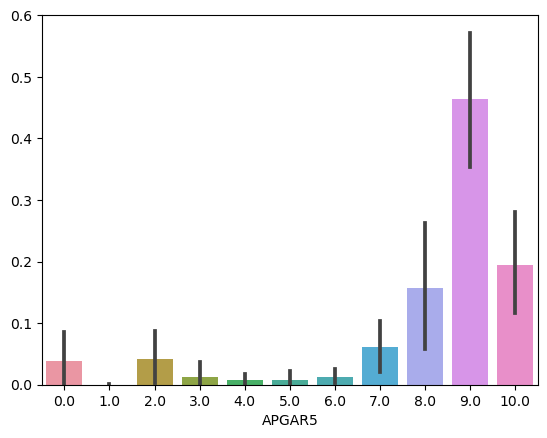

In [201]:
sns.barplot(data=tab_porc)
#abaixo de 8.0 o bebe sofre enfrentamento de asfixia. E no gráfico mostra que o intervalo de confiança 
# abaixo de 8.0 é maior os casos de asfixia.  

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [ ]:
#pegando os APGAR abaixo de 8 para ver a incidência com o peso.
ap_abaixo = df[df['APGAR5'] < 8.0]

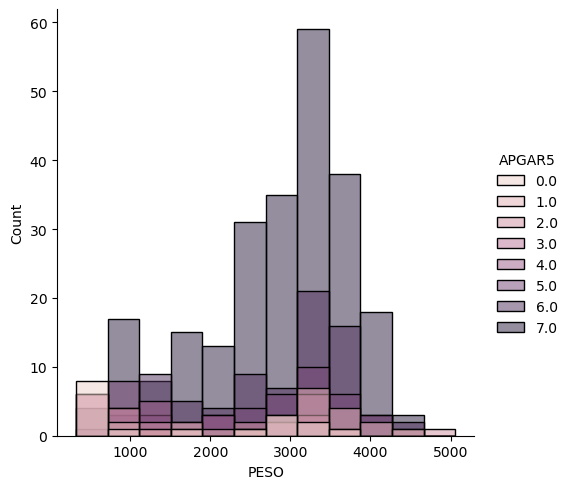

In [272]:
#usando o df ap_baixo para pegar todos os pesos com menos de 8.0, pois o PESO E APGAR5 tem relação
#Quanto mais baixa a idade gestacional, menor será o peso do bebê.
sns.displot(data=ap_abaixo, x='PESO', hue='APGAR5')